In [2]:
import sys
import os

# Agregar scripts al path
sys.path.append(os.path.abspath('../scripts'))

# Importar función
from alfa_dbasmote import alpha_distance_borderline_adasyn_smote

# Configuración inicial
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from collections import Counter

In [3]:
# Ejemplo: cargar el dataset ecoli
ruta_ecoli = "../datasets/ecoli/ecoli.data"
df = pd.read_csv(ruta_ecoli, header=None, delim_whitespace=True)

df.head()


C:\Users\User\AppData\Local\Temp\ipykernel_15036\1908965569.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(ruta_ecoli, header=None, delim_whitespace=True)


,0,1,2,3,4,5,6,7,8
0,AAT_ECOLI,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,ACEA_ECOLI,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,ACEK_ECOLI,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,ACKA_ECOLI,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,ADI_ECOLI,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [4]:
# Seleccionar solo características numéricas (columnas 1 a 7)
X = df.iloc[:, 1:8].values
y = df.iloc[:, 8].values

# Visualizar clases únicas
from collections import Counter
print("Distribución original:", Counter(y))


Distribución original: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})


In [5]:
# Binaria: 'cp' vs resto
y_bin = np.where(y == 'cp', 1, 0)

X_min = X[y_bin == 1]
X_maj = X[y_bin == 0]

print("Nueva distribución binaria:", Counter(y_bin))


Nueva distribución binaria: Counter({np.int64(0): 193, np.int64(1): 143})


In [6]:
# Aplicar el algoritmo
X_syn = alpha_distance_borderline_adasyn_smote(X_min, X_maj, beta=1.0, m=5, random_state=42)

print("Muestras sintéticas generadas:", X_syn.shape[0])


Muestras sintéticas generadas: 46


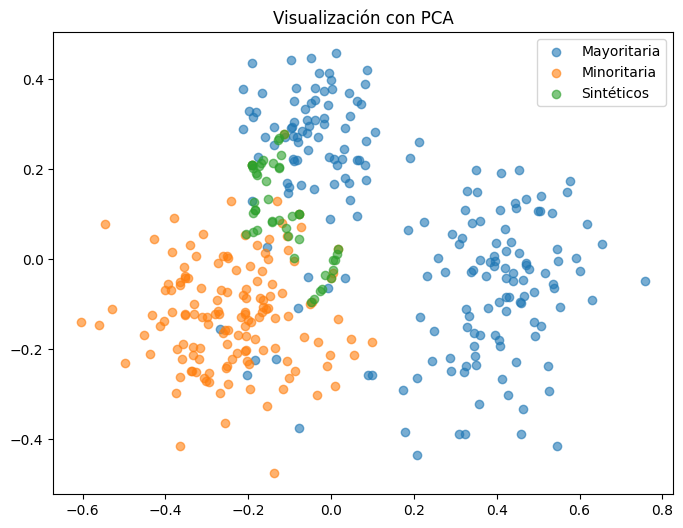

In [7]:
import matplotlib.pyplot as plt

# Visualización en 2D (PCA para reducción si hay muchas dimensiones)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_vis = pca.fit_transform(np.vstack([X_min, X_maj, X_syn]))

y_vis = (
    [1] * len(X_min) +
    [0] * len(X_maj) +
    [2] * len(X_syn)  # etiqueta ficticia para sintéticos
)

plt.figure(figsize=(8, 6))
plt.scatter(X_vis[np.array(y_vis) == 0][:, 0], X_vis[np.array(y_vis) == 0][:, 1], label='Mayoritaria', alpha=0.6)
plt.scatter(X_vis[np.array(y_vis) == 1][:, 0], X_vis[np.array(y_vis) == 1][:, 1], label='Minoritaria', alpha=0.6)
plt.scatter(X_vis[np.array(y_vis) == 2][:, 0], X_vis[np.array(y_vis) == 2][:, 1], label='Sintéticos', alpha=0.6)
plt.legend()
plt.title("Visualización con PCA")
plt.show()
